In [1]:
import pandas as pd

df = pd.read_json('/workspace/data/hn/stories_dump.jsonl', lines=True)
df.to_feather('/workspace/data/hn/stories_dump.feather')

df.describe()

In [48]:
import pandas as pd

df = pd.read_feather('/workspace/data/hn/stories_dump.feather')

In [59]:
df.rename(columns={'descendants': 'comments'}, inplace=True)

df['time'] = pd.to_datetime(df['time'], unit='s')
df['dead'] = df.dead.fillna(0).astype(bool)

In [60]:
# Keep stories from 2018 onward in case community tastes have changed
df = df[df['time'].dt.year > 2017]

In [61]:
# Deduplicate stories based on the URL. Keep the one with the highest score.

print(df.shape)

df.sort_values(by=['score'], ascending=False, inplace=True)
df = df.drop_duplicates(subset=['url'], keep='first')

print(df.shape)

(1523641, 15)
(1523641, 15)


In [79]:
df['frontpage'] = (df.score > 20) | (df.comments > 10)
df['has_text'] = df['text'].notnull()

# Show a 2x2 table of the number of stories that are probably frontpage and have text.
stack = df.groupby(['frontpage', 'has_text']).size().unstack()

stack = stack / len(df)
stack

has_text,False,True
frontpage,,
False,0.870548,0.002969
True,0.125653,0.000831


In [70]:
# show as html
import pandas as pd
from IPython.display import HTML

HTML(df[df.dead].sample(10).to_html())

,by,comments,id,score,time,title,type,url,dead,text,kids,deleted,probably_frontpage,has_text,week
1098157,IreneisHippie,NaN,24300356,1.0,2020-08-28 00:55:31,Exploring the Huawei Health Kit: Data Controller,story,https://forums.developer.huawei.com/forumPortal/en/topicview?tid=0201326975480310022&fid=0101246461018590361,True,None,None,NaN,False,False,2020-35
759067,cbdvskratom,NaN,27632309,1.0,2021-06-25 15:50:59,CBD Oil During Pregnancy: Is IT Safe to Use?,story,https://cbdvskratom.com/cbd-oil-during-pregnancy-is-it-safe-to-use/,True,None,None,NaN,False,False,2021-25
1799815,cb305,NaN,18478353,1.0,2018-11-18 01:22:21,The Keys to Well Being – Wellness and High Vibration Living,story,https://www.peaceful-island.com/insights-by-peaceful-island/the-keys-to-wellness-and-well-being-how-to-live-a-high-vibration-life-depression-anxiety-insomnia-chronic-illness-remission-cancer-treatment-alternatives-healthy-living-positive,True,None,None,NaN,False,False,2018-46
1451820,musicpromotion,NaN,21387213,1.0,2019-10-29 13:59:14,Crystal Starr's UK Press Tour,story,https://musicnews.skunkradiolive.com/2019/10/Music-News-RNB-Tour-Announcements-Dates-2019-October-29-Crystal-Starr.html#.XbhFoEJGSbU.hackernews,True,None,None,NaN,False,False,2019-44
2066413,deviceguru,NaN,16476993,1.0,2018-02-27 19:30:27,Customizable Alexa dev board runs Linux on i.MX7 module,story,http://linuxgizmos.com/customizable-alexa-development-board-builds-on-i-mx7-module/,True,None,None,NaN,False,False,2018-9
1760159,sami6006163,NaN,18783045,1.0,2018-12-29 10:52:28,FIFA 19 Patch and Serial Keygen Generator Free Download,story,https://fifa19crack.info/fifa-19-patch-serial-keygen-generator-free-download/,True,None,None,NaN,False,False,2018-52
991024,Kodziak,NaN,25282815,1.0,2020-12-02 22:49:29,First steps with UI test automation,story,https://kodziak.com/blog/first-steps-with-test-automation/,True,None,[25282817],NaN,False,False,2020-49
946297,mrfusion,NaN,25738072,2.0,2021-01-11 22:07:35,Florida puts New York to shame in rational pandemic policies,story,https://nypost.com/2021/01/10/florida-puts-new-york-to-shame-in-rational-pandemic-policies/,True,None,None,NaN,False,False,2021-2
1221340,Samisthebest,NaN,23221985,1.0,2020-05-18 13:23:47,Free Robux Promo Codes for Roblox,story,https://rbx.fyi/?r=lN1F3,True,None,None,NaN,False,False,2020-21
1841826,smkghosh,NaN,18159158,1.0,2018-10-07 06:38:50,Top Fastest Supercomputers in the World(#2 Is the Best),story,https://tekkibytes.com/top-10-fastest-supercomputer-in-the-world/,True,None,None,NaN,False,False,2018-40


In [78]:
df[df.frontpage]

AttributeError: 'DataFrame' object has no attribute 'frontpage'

<Axes: xlabel='week'>

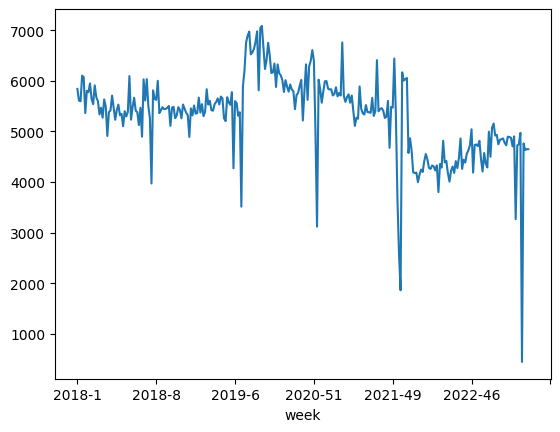

In [64]:
# Graph the number of stories by week

df['week'] = df['time'].dt.year.astype(str) + '-' + df['time'].dt.isocalendar().week.astype(str)


df['week'].value_counts().sort_index().plot()

In [65]:
df[df['time'].dt.year > 2017].shape

(1523641, 15)

In [77]:
df[df.text.isna()].shape

(1517852, 15)